# 시각화 기법

## X축 tick label 다루기
시계열 그래프는 x축 시간을 설정 > 변화하는 변수를 설정하는 차트

- 시계열 그래프의 x축 라벨 설정
- 데이터셋 : ABNB_stock.csv

In [14]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
df_abnb = pd.read_csv(
    './data/ABNB_stock.csv'
)
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


In [10]:
df_abnb.head()
df_abnb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500
453,2022-09-30,104.760002,109.080002,104.730003,105.040001,105.040001,4747800


In [ ]:
# 454개의 데이터
# close - 종가. 연속형 타입 
# date - 날짜 타입

<Axes: xlabel='Date', ylabel='Close'>

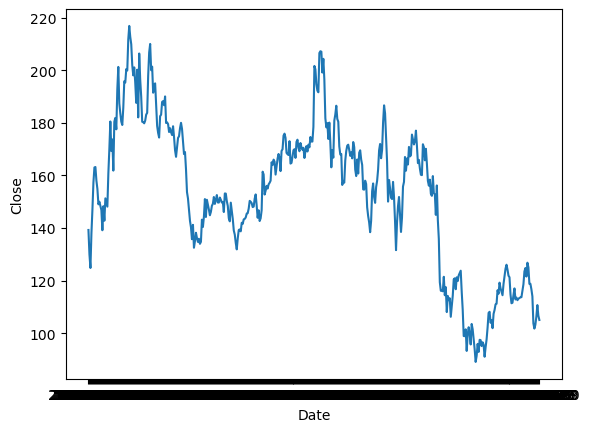

In [8]:
# 날자별로 종가를 연결하는 라인 차트
fig, ax = plt.subplots() # figure, ax - 축
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

In [11]:
# datetime type으로 변환
df_abnb['Date'] = pd.to_datetime(df_abnb['Date'])
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       454 non-null    datetime64[ns]
 1   Open       454 non-null    float64       
 2   High       454 non-null    float64       
 3   Low        454 non-null    float64       
 4   Close      454 non-null    float64       
 5   Adj Close  454 non-null    float64       
 6   Volume     454 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.0 KB


<Axes: xlabel='Date', ylabel='Close'>

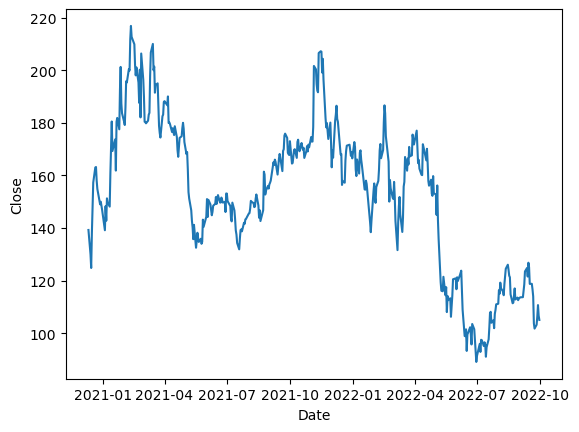

In [12]:
# 날자별로 종가를 연결하는 라인 차트
fig, ax = plt.subplots() # figure, ax - 축
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

In [ ]:
# 축레벨 회전, 표현방식을 변경 > formatter 를 사용

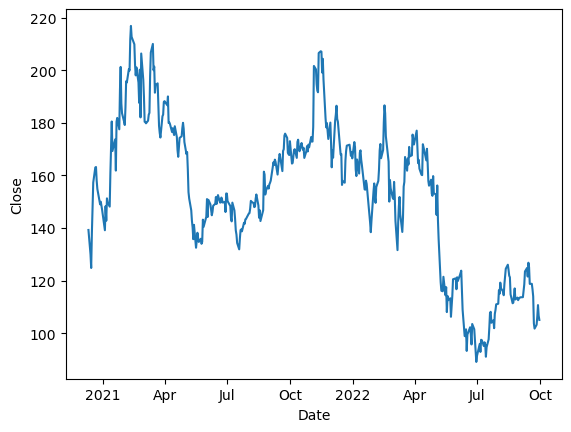

In [ ]:
import matplotlib as mpl

fig, ax = plt.subplots() # figure, ax - 축
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
# 시작 년도와 월이 출력됨

In [15]:
# plotly line
px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)

In [17]:
fig = px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)
fig.update_xaxes(tickformat='%Y-%m-%d')
# 날짜 지정

In [18]:
fig = px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)
fig.update_xaxes(tickformat="%A %d. %B %Y")
# 날짜 지정

# 다중 축 차트

기본 차트 x, y + y1, y2 -> 하나의 ax에 그리기

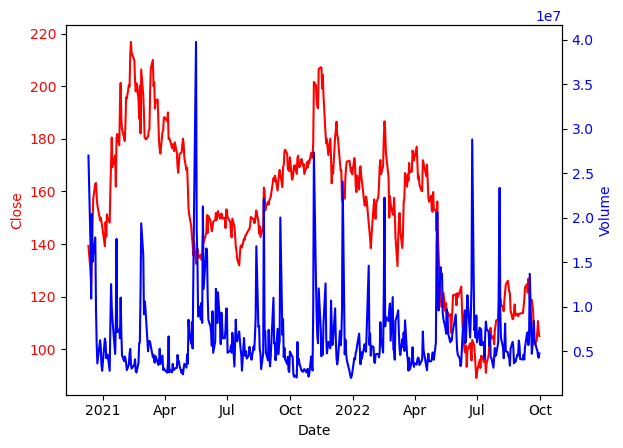

In [ ]:
# 거래량과 종가 그래프 그리기
fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax,  color='red')
sns.lineplot(x='Date', y='Volume', data=df_abnb, ax=ax2, color='blue')

# 왼쪽 y축 정보 설정
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')

# 오른쪽 y축
ax2.tick_params(axis='y', labelcolor='blue')
ax2.yaxis.label.set_color('blue')

# x축 날짜 포맷 지정하기
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [31]:
df_abnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [ ]:
# 최고가 - 최저가 = HighLow 변수
df_abnb['High-Low'] = df_abnb['High'] - df_abnb['Low']
df_abnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,16.399994
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,10.139999
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,6.099998
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,17.089996
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,9.779999


<Axes: xlabel='Date', ylabel='High-Low'>

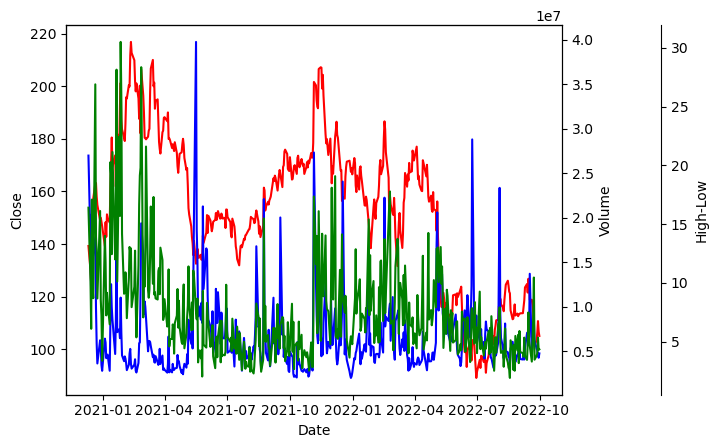

In [38]:
# 3개 축
fig, ax = plt.subplots()

ax2 = ax.twinx() # 축 추가
ax3 = ax.twinx() # 축 추가

ax3.spines.right.set_position(('axes', 1.2)) # ax3 의 축은 현재축 위치 1에서 0.2만큼 오른쪽으로 이동
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax,  color='red')
sns.lineplot(x='Date', y='Volume', data=df_abnb, ax=ax2, color='blue')
sns.lineplot(x='Date', y='High-Low', data=df_abnb, ax=ax3, color='green')

In [ ]:
# plotly 로 2중축 차트
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y":True}]]) # 추가하려는 축 2차원 list spec 지정

# 축 설정
sub_fig_1 = px.line(df_abnb, x='Date', y='Close')
sub_fig_1.update_traces(line_color='red')
sub_fig_2 = px.line(df_abnb, x='Date', y='Volume')
sub_fig_2.update_traces(line_color='blue')
sub_fig_2.update_traces(yaxis='y2')

# 2개의 차트 합치기
fig.add_traces(sub_fig_1.data + sub_fig_2.data)

# 레이블 설정
fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Close'
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.title = 'Volume'
fig.layout.yaxis2.color = 'blue'

fig.update_layout(width=500, height=400)

In [80]:
# plotly.graph_object
# 3개 축 그리기

import plotly.graph_objects as go

fig = make_subplots()
fig.add_traces(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
        mode = 'lines', yaxis='y', line={'color':'red'}
        ) # 1번째 축
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
        mode = 'lines', yaxis='y2', line={'color':'blue'}
        ) # 2번째 축 Volume
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['High-Low'], name='High-Low',
        mode = 'lines', yaxis='y3', line={'color':'green'}
        ) # 3번째 축 High-Low
)
fig.update_layout(
    yaxis = dict(title='Close'),
    yaxis2 = dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
    yaxis3 = dict(title='High-Low', side='right', anchor='x', overlaying='y'),
    xaxis = dict(title='Date', domain=[.1, .85]),
    width=600, height=400
)

fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()


In [ ]:
# 범례 위치 조정하기

In [81]:
df_co2 = pd.read_csv(
    './data/CO2_Emissions.csv'
)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
x축: Fuel Consumption Comb (L/100 km)
y축: CO2 Emissions(g/km)

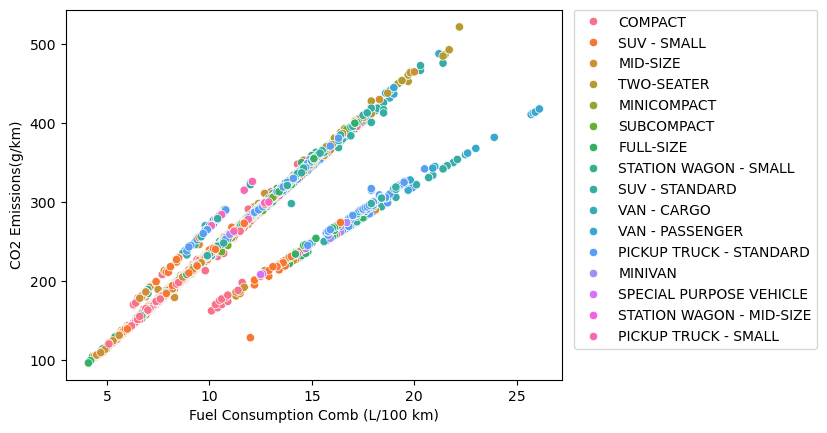

In [92]:
fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2, hue = 'Vehicle Class',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

In [112]:
# plotly scatter
fig = px.scatter(
  data_frame=df_co2, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', color='Vehicle Class', width=800, height=600
)
fig.update_layout(legend_x= 1.02,legend_y= 0.5) # 상대적인 경로 지정
fig.show()

# 강조하기
테두리 색, 굵기 조정

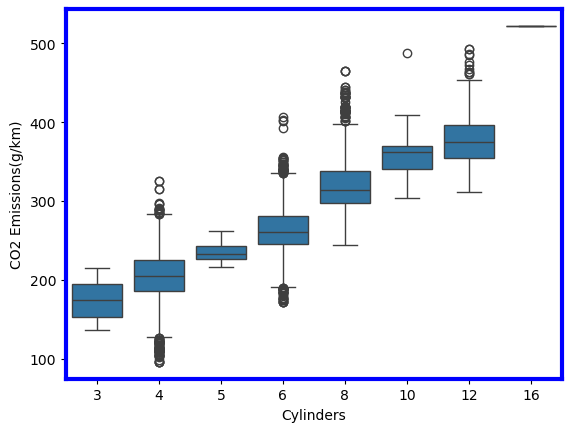

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(
    x = 'Cylinders', y = 'CO2 Emissions(g/km)',
    data = df_co2, ax=ax
)
spines = ['left', 'right', 'top', 'bottom'] # 키워드는 예약어라 맞춰주기
for spin in spines:
    ax.spines[spin].set_color('blue') # 테두리 지정. 색상
    ax.spines[spin].set_linewidth(3) # 굵기

In [123]:
# plotly 테두리 강조하기
fig = px.box(x = 'Cylinders', y = 'CO2 Emissions(g/km)',
    data_frame = df_co2)
fig.update_xaxes(showline=True, linecolor='black', linewidth=3 , mirror=True)
fig.update_yaxes( showline=True, linecolor='black', linewidth=3, mirror=True) # 매개변수로 설정
fig.show()

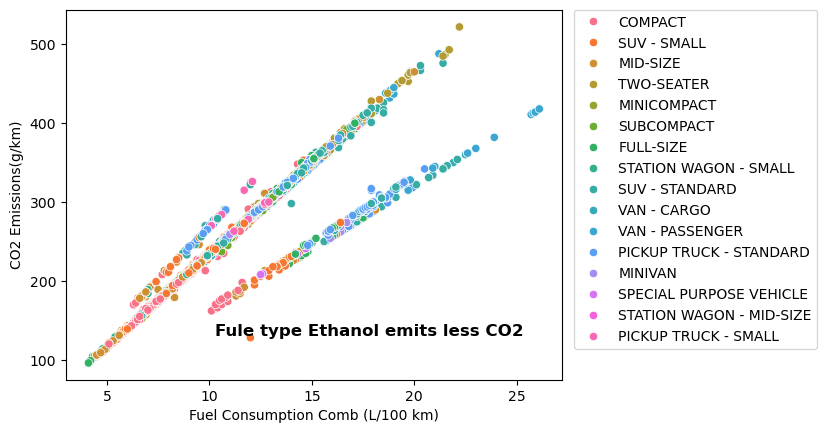

In [ ]:
# 텍스트, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2, hue = 'Vehicle Class',
    ax=ax
)
ax.text(
    x=10, y=130, # 절대좌표 지정, 상대좌표로 변경 -> 옵션 추가
    s='Fule type Ethanol emits less CO2',
    fontdict={'fontsize':12, 'weight':'bold'},
    transform=ax.transAxes # 상대좌표를 전달
) # 포인트 위치에 표시하기

ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

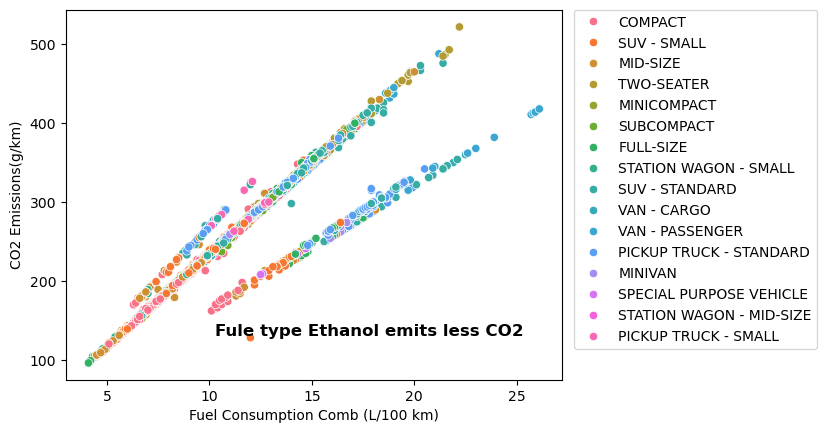

In [ ]:
# 텍스트, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2, hue = 'Vehicle Class',
    ax=ax
)
ax.text(
    x=0.3, y=0.12, # 상대좌표로 변경
    s='Fule type Ethanol emits less CO2',
    fontdict={'fontsize':12, 'weight':'bold'},
    transform=ax.transAxes # 상대좌표를 전달
) # 포인트 위치에 표시하기

ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

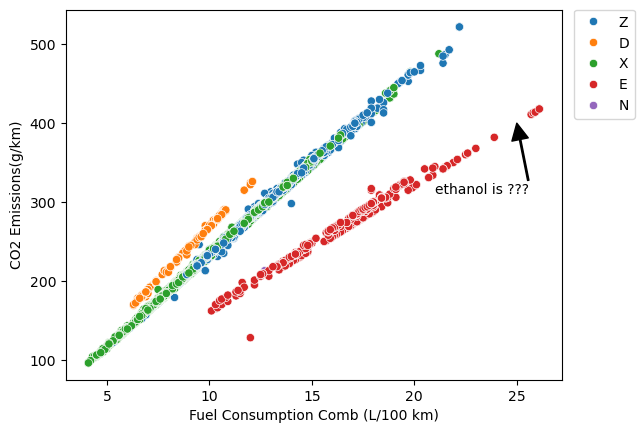

In [136]:
# 텍스트, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2, hue = 'Fuel Type',
    ax=ax
)
ax.annotate(
    xy=(25,400), # 절대좌표 지정
    text='ethanol is ???',
    xytext=(21,310), # 텍스트의 좌표
    arrowprops = {'color':'black', 'width':1},
)

ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

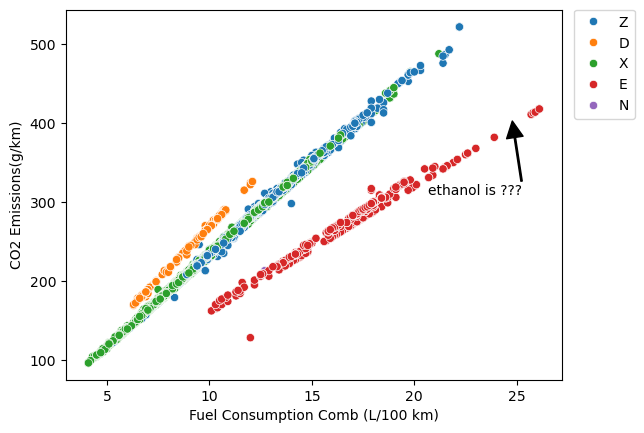

In [147]:
# 텍스트, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2, hue = 'Fuel Type',
    ax=ax
)
ax.annotate(
    xy=(0.9, 0.7), # 화살표의 상대좌표
    text='ethanol is ???',
    xytext=(0.73,0.5), # 텍스트의 좌표
    arrowprops = {'color':'black', 'width':1},
    xycoords=ax.transAxes # 상대좌표
)

ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

In [159]:
# plotly scatter
fig = px.scatter(
  data_frame=df_co2, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', color='Fuel Type', width=800, height=600
)
fig.update_layout(legend_x= 1.02,legend_y= 1) 

fig.add_annotation(
    # x=20, y=130,
    x=0.9, y=0.75, # 상대좌표
    text='<b>fuel type ethanol emits less CO2</b>',
    yref = 'y domain', xref = 'x domain',
    showarrow=True, arrowhead=2
)
fig.show()

In [ ]:
# 조건을 이용한 강조하기

In [ ]:
# 기하급수적으로 커지는 y축값을 변환해서 표현

In [ ]:
# 색상 선택하기